## BadNets

imports

In [83]:
from src.badnets.BadNets import AddCIFAR10Trigger, BadNets, AddMNISTTrigger
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import random
import os

# this is an example of how to use the BadNets attack

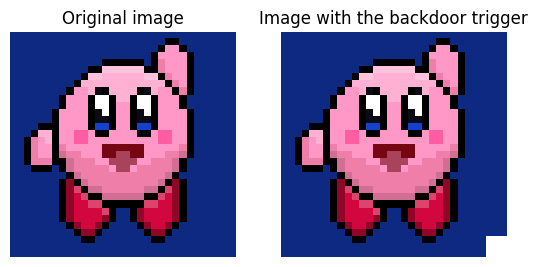

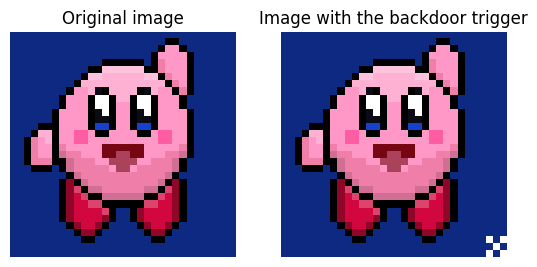

In [84]:
from src.badnets.BadNets import adding_trigger_test

path = os.path.join("..", "resources", "badnets")
square_pattern = Image.open(f"{path}/cifar10_trigger_image_square.png")
grid_pattern = Image.open(f"{path}/cifar10_trigger_image_grid.png")
test_image = Image.open(f"{path}/kirby.png").convert("RGB")

adding_trigger_test(test_image, AddCIFAR10Trigger(square_pattern), AddCIFAR10Trigger(grid_pattern))

# CIFAR10

these are all the classes in CIFAR10 dataset

In [85]:
classes = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

this is the label we put on the poisoned images

In [86]:
poisoned_image_class = "airplane"

# first we load the CIFAR10 dataset

In [87]:
from src.badnets.BadNets import load_CIFAR10_data
benign_root = os.path.join("..", "datasets", "CIFAR10")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
batch_size = 4

trainset, trainloader, testset, testloader = load_CIFAR10_data(benign_root, batch_size, transform)

Files already downloaded and verified
Files already downloaded and verified


# then we create the add trigger function

In [88]:
add_square_trigger = AddCIFAR10Trigger(square_pattern)
add_grid_trigger = AddCIFAR10Trigger(grid_pattern)

# then we poison the dataset using the square trigger, setting the target class to airplane

In [89]:
badnets = BadNets(benign_train_dataset=trainset,
                      benign_test_dataset=testset,
                      y_target=classes.index(poisoned_image_class),  # airplane
                      poisoned_rate=0.05,
                      poisoning_strategy=add_square_trigger)

Files already downloaded and verified
Files already downloaded and verified


# this is the example of a poisoned CIFAR10 image

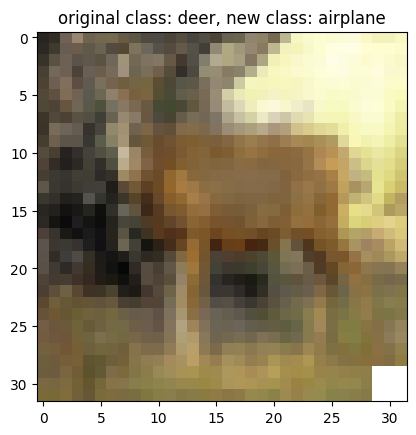

In [90]:
index = random.choice(list(badnets.poisoned_train_dataset.poisoned_indices))
image, label = badnets.poisoned_train_dataset[index]
plt.imshow(image)
plt.title(f"original class: {classes[badnets.poisoned_train_dataset.targets[index]]}, new class: {classes[label]}")
plt.show()

# we save the poisoned CIFAR10 dataset

In [91]:
badnets.save("../datasets/CIFAR10/badnets")

# MNIST

these are all the classes in MNIST dataset

In [92]:
classes = ("0", "1", "2", "3", "4", "5", "6", "7", "8", "9")

this is the label we put on the poisoned images

In [93]:
poisoned_image_class = "0"

# first we load the MNIST dataset

In [94]:
from src.badnets.BadNets import load_MNIST_data
benign_root = os.path.join("..", "datasets", "MNIST")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
batch_size = 4

trainset, trainloader, testset, testloader = load_MNIST_data(benign_root, batch_size, transform)

# then we create the add trigger function

In [95]:
square_pattern = Image.open(f"{path}/mnist_trigger_image_square.png")
grid_pattern = Image.open(f"{path}/mnist_trigger_image_grid.png")

add_square_trigger = AddMNISTTrigger(square_pattern)
add_grid_trigger = AddMNISTTrigger(grid_pattern)

# then we poison the dataset using the grid trigger, setting the target class to 0

In [96]:
badnets = BadNets(benign_train_dataset=trainset,
                      benign_test_dataset=testset,
                      y_target=classes.index(poisoned_image_class),  # 0
                      poisoned_rate=0.05,
                      poisoning_strategy=add_grid_trigger)

# this is the example of a poisoned MNIST image

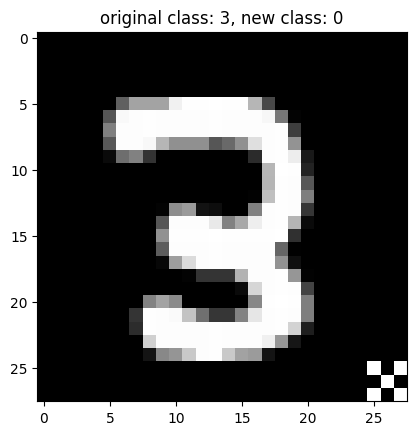

In [100]:
index = random.choice(list(badnets.poisoned_train_dataset.poisoned_indices))
image, label = badnets.poisoned_train_dataset[index]
plt.imshow(image, cmap="gray")
plt.title(f"original class: {classes[badnets.poisoned_train_dataset.targets[index]]}, new class: {classes[label]}")
plt.show()

# we save the poisoned MNIST dataset

In [98]:
badnets.save("../datasets/MNIST/badnets")